In [148]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [149]:
#df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date', index_col='Created_Date')
#df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date', index_col='Created_Date')
#df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date', index_col='Created_Date')
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [150]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [151]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
df_2016 = df_2016.set_index('Created_Date')

In [152]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [153]:
df_2014.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2014-01-01,1512,388,155,336,139,303,34,10,0
2014-01-02,3236,921,263,360,315,320,33,9,1
2014-01-03,3712,624,235,306,240,516,19,4,2
2014-01-04,4347,489,154,375,130,1188,31,10,3
2014-01-05,2529,500,169,361,206,1022,49,1,4


In [154]:
df_2016.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2016-01-01,0,0,0,0,0,0,42,0,0
2016-01-02,0,0,0,0,0,0,40,0,1
2016-01-03,0,0,0,0,0,0,45,0,2
2016-01-04,0,0,0,0,0,0,36,0,3
2016-01-05,0,0,0,0,0,0,29,0,4


In [173]:
df_2015.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2015-01-01,1607,369,273,438,112,264,40,8,0
2015-01-02,1935,604,581,588,282,499,45,8,1
2015-01-03,1527,465,369,511,156,322,47,4,2
2015-01-04,1230,395,403,486,165,357,55,1,3
2015-01-05,2797,748,705,625,537,734,51,8,4


In [156]:
train_years = pd.concat([df_2014, df_2015])

In [228]:
feature_cols = ['Building_Conditions', 
             'General_Request', 
             'Living_Conditions', 
             'Parking_Enforcement', 
             'Signal_Sign_Repair', 
             'Street_Sidewalk_Repair', 
             'day']
X = train_years[feature_cols]
y = train_years.Max_TempF

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [230]:
models = [('LinearRegression',LinearRegression())
          ,('LogisticRegression',LogisticRegression())
          ,('LinearSVC',LinearSVC())
          ,('SVR',SVR())]

scores = {}
for name, model in models:
    model.fit(X_train, y_train)
    result = model.score(X_test,y_test)
    scores[name] = result

In [231]:
pd.DataFrame(scores,index=[0])

,LinearRegression,LinearSVC,LogisticRegression,SVR
0,0.814758,0.054795,0.068493,-0.042325


In [233]:
df_pred = pd.DataFrame({'pred':lgr.predict(X_test),'actual':y_test})

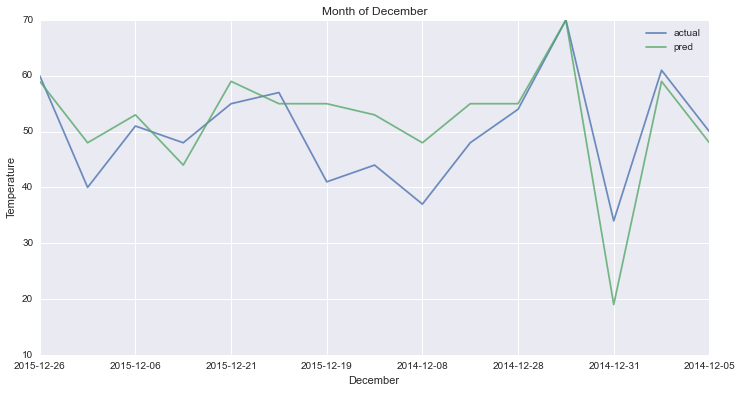

In [252]:
df_pred[pd.to_datetime(df_pred.index).month==12].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('Month of December')
plt.xlabel('December')
plt.ylabel('Temperature')

In [318]:
df_weather = train_years

In [319]:
feature_cols = ['Building_Conditions', 
             'General_Request', 
             'Living_Conditions', 
             'Parking_Enforcement', 
             'Signal_Sign_Repair', 
             'Street_Sidewalk_Repair', 
             'day']
X = df_weather[feature_cols]
y = df_weather.Weather

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [321]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# First Attempt

#### Using just SVC() 

In [322]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.38356164383561642

# Second Attempt

#### Using StandardScaler with Pipeline

In [359]:
pipeline = Pipeline([("scaler", StandardScaler()),
                    ("svc", RandomForestClassifier())])

In [360]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [361]:
pipeline.score(X_test,y_test)

0.5821917808219178

# Third Attempt

#### Using GridSearch

In [362]:
import numpy as np

In [363]:
param_grid = {'svc__gamma':10.**np.arange(-3,3),
              'svc__C': 10.**np.arange(-3,3)}

In [364]:
clf_grid = GridSearchCV(pipeline, param_grid)

In [365]:
clf_grid.fit(X_train, y_train)

ValueError: Invalid parameter gamma for estimator RandomForestClassifier

In [331]:
clf_grid.score(X_test, y_test)

0.56164383561643838

In [335]:
df_grid = pd.DataFrame({'actual':y_test,'pred':clf_grid.predict(X_test)})

In [345]:
X_2015 = df_2015[feature_cols]
y_2015 = df_2015.Weather

In [352]:
df_2015 = pd.DataFrame({'pred':clf_grid.predict(X_2015),'actual':y_2015})

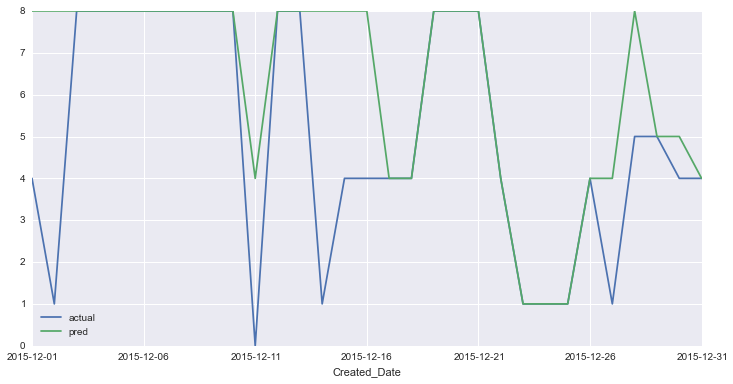

In [355]:
df_2015[pd.to_datetime(df_2015.index).month==12].plot(figsize=(12,6))

# Fourth Attempt

In [356]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [357]:
lf = RandomForestClassifier()
lf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [358]:
lf.score(X_test,y_test)

0.54109589041095896

In [164]:
svr = svr.fit(X_train, y_train)

In [125]:
#svr.predict(X)

In [165]:
clf = clf.fit(X_train,y_train)

In [141]:
#clf.predict(X)

In [166]:
lr = lr.fit(X_train,y_train)

In [116]:
print 'Regression Coefficients: \n', lr.coef_

Regression Coefficients: 
[-0.0115444   0.01557943  0.04571485 -0.02602712 -0.02382624  0.009924
  0.04715253]


In [117]:
lr.score(X,y)

0.79543462979218815

In [118]:
p = lr.predict(X)
err = abs(p-y)

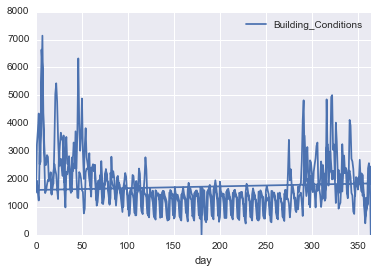

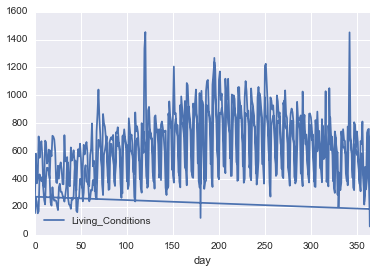

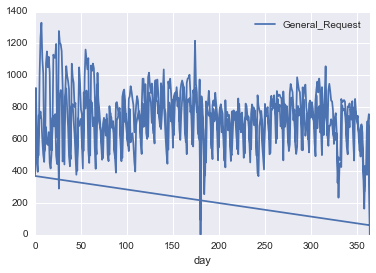

In [119]:
train_years.plot(kind='line',x='day',y='Building_Conditions')
train_years.plot(kind='line',x='day',y='Living_Conditions')
train_years.plot(kind='line',x='day',y='General_Request')

In [68]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#train_years.plot(kind='scatter', x=X, y='Max_TempF', ax=axs[0], figsize=(16, 8))
#train_years.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
#train_years.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2014.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2014.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2014.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Parking_Enforcement', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])